<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Max_Reward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture 
!pip install jaxopt 

In [2]:
import jax 
import jax.numpy as jnp 
import matplotlib as mpl
from functools import partial 
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

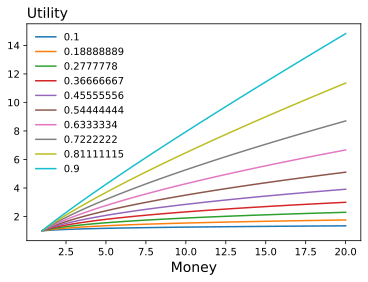

In [8]:
xs = jnp.linspace(1, 20, 100)
fig = plt.figure(dpi=300)
for i in jnp.linspace(0.1, 0.9, 10):
  f = lambda x: x**i 
  ys = jax.vmap(f)(xs)
  plt.plot(xs, ys, label=i)
plt.xlabel('Money', size=14)
plt.title('Utility', loc='left', size=14)
plt.legend(frameon=False)
fig.savefig('utils_graph.png', format='png')
plt.show()

In [14]:
from jaxopt import Bisection

def F(x, a, W):
  wealth_utils = W**a 
  expected_utility = 0.5*(W + x)**a + 0.5*(W-100)**a
  return wealth_utils -  expected_utility

def root(a, W):
  bisec = Bisection(optimality_fun=F, lower=100, upper=100000)
  return bisec.run(a=a, W=W).params

In [18]:
results = []
for i in jnp.linspace(0.2, 0.9, 10):
  results.append(root(i, 100.))

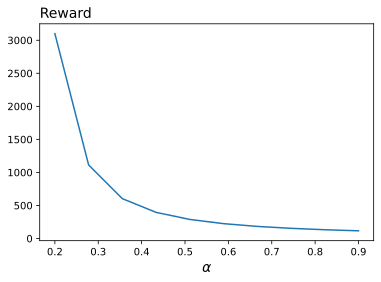

In [21]:
fig = plt.figure(dpi=300)
plt.plot(jnp.linspace(0.2, 0.9, 10), results)
plt.xlabel(r'$\alpha$', size=14)
plt.title('Reward', loc='left', size=14)
plt.legend(frameon=False)
fig.savefig('max_value.png', format='png')
plt.show()